In [1]:
import tensorflow as tf
#keras-3.0.5 & tensorflow-2.16.1 버전 확인 잘해야함. 안맞으면 작동 안함..
#pip install keras==3.0.5
from keras.src.legacy.preprocessing.image import ImageDataGenerator
tf.test.gpu_device_name()

''

In [72]:
import numpy as np
import pandas as pd
import cv2  
import os  
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
%matplotlib inline

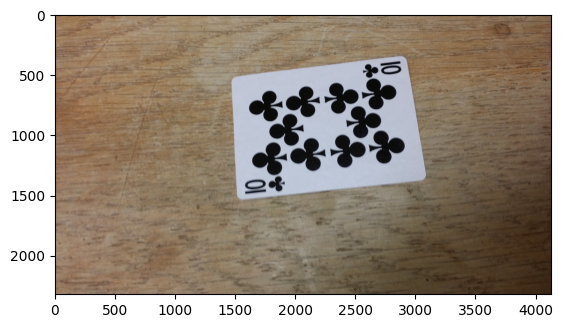

In [73]:
image = imread('C:/Users/syoun/repos/detection/playing-cards/img/cards-[C0]-001.jpg')
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
imshow(images[0])
show()

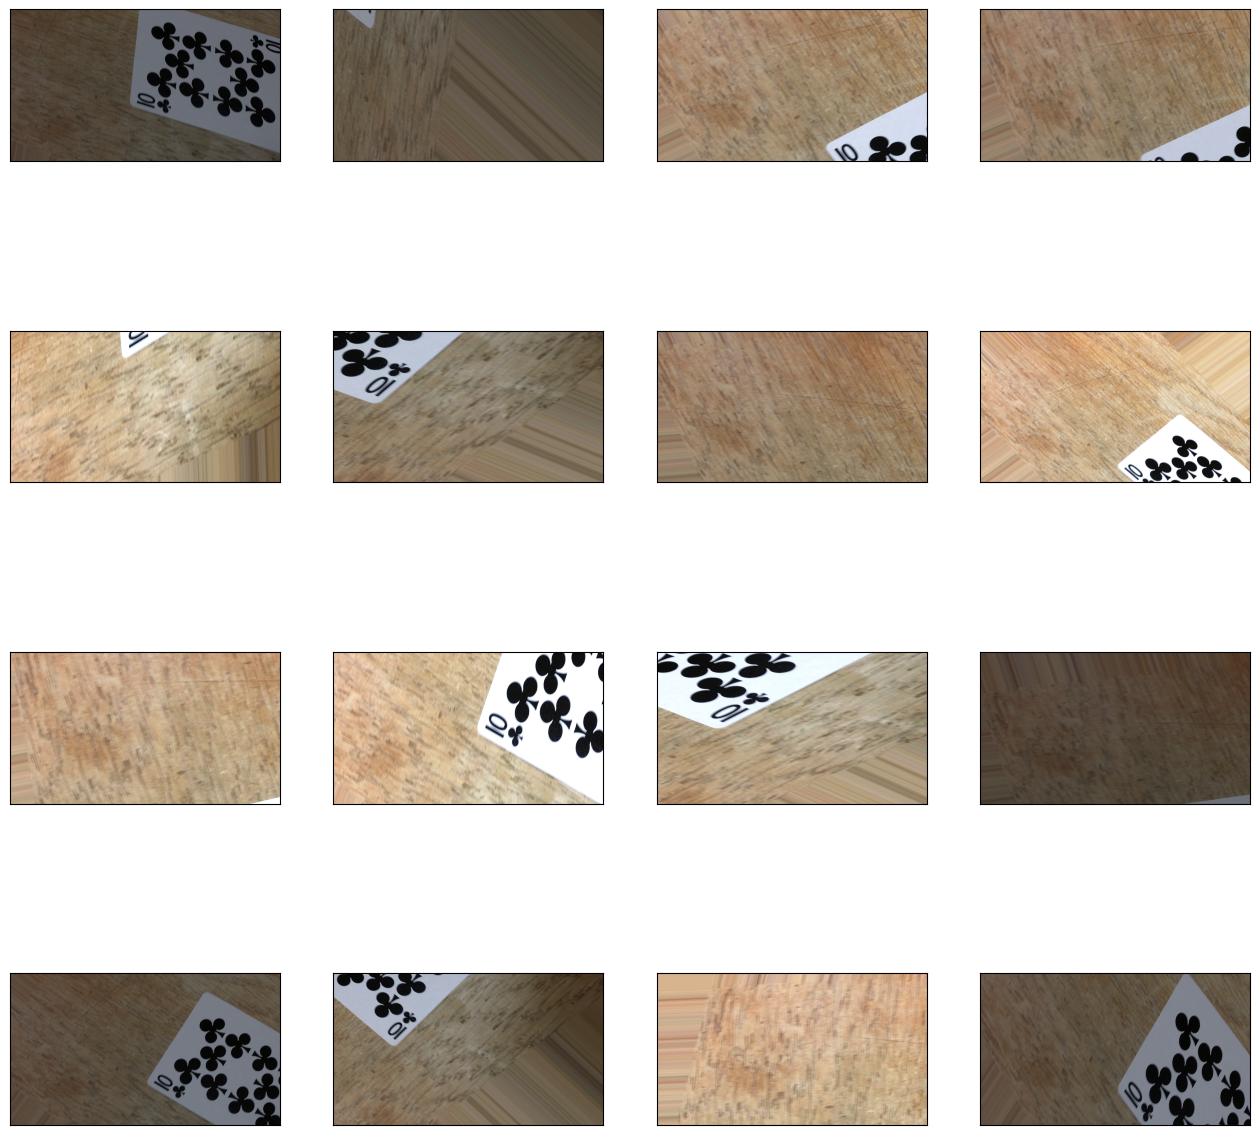

In [74]:
data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0, zoom_range=[.3, .8])
data_generator.fit(images)
image_iterator = data_generator.flow(images)

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(next(image_iterator)[0].astype('int'))
plt.show()

In [75]:
# data=[]

# for i, img in tqdm(enumerate(os.listdir('C:/Users/syoun/repos/detection/playing-cards/img/'))):
#     label=i
    
#     img = cv2.imread('C:/Users/syoun/repos/detection/playing-cards/img/'+img, cv2.IMREAD_GRAYSCALE)
#     img = cv2.resize(img, (180, 180))
#     imgs = img.reshape((1, img.shape[0], img.shape[1], 1))
#     data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0, zoom_range=[.3, .8])
#     data_generator.fit(imgs)
#     image_iterator = data_generator.flow(imgs)
    
#     for x in range(750):
#         img_transformed=next(image_iterator)[0].astype('int') / 255
#         data.append([img_transformed, label])

# shuffle(data)

In [76]:
data=[]

for img_file in tqdm(os.listdir('C:/Users/syoun/repos/detection/playing-cards/img/')):
    label = img_file.split('.')[0]  # 이미지 파일 이름에서 레이블 추출
    
    img = cv2.imread('C:/Users/syoun/repos/detection/playing-cards/img/'+img_file, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (180, 180))
    img = img.astype('float32') / 255.0  # 이미지 데이터를 부동소수점으로 변환하고 정규화
    
    # 데이터 증강을 수행하고 데이터와 레이블을 추가
    data.append([img, label])

shuffle(data)

100%|██████████| 216/216 [00:13<00:00, 15.56it/s]


In [77]:
for item in data:
    print(item)

[array([[0.20784314, 0.2       , 0.18039216, ..., 0.09411765, 0.10980392,
        0.10980392],
       [0.2       , 0.21960784, 0.19607843, ..., 0.10196079, 0.09803922,
        0.09411765],
       [0.19215687, 0.21960784, 0.1882353 , ..., 0.10588235, 0.09411765,
        0.09803922],
       ...,
       [0.20784314, 0.21176471, 0.23529412, ..., 0.11372549, 0.09019608,
        0.0627451 ],
       [0.16862746, 0.21176471, 0.23137255, ..., 0.07843138, 0.05098039,
        0.07450981],
       [0.21176471, 0.2627451 , 0.20392157, ..., 0.0627451 , 0.07843138,
        0.06666667]], dtype=float32), 'cards-[H5]-004']
[array([[0.43137255, 0.5058824 , 0.4117647 , ..., 0.43137255, 0.32941177,
        0.4       ],
       [0.45882353, 0.4862745 , 0.3254902 , ..., 0.4392157 , 0.41960785,
        0.40784314],
       [0.49411765, 0.4509804 , 0.30588236, ..., 0.34509805, 0.47843137,
        0.44705883],
       ...,
       [0.21568628, 0.08627451, 0.20784314, ..., 0.27450982, 0.32156864,
        0.30980393],

In [78]:
# # 데이터를 NumPy 배열로 변환
# data_array = np.array([[item[0], int(item[1].split('-')[1])] for item in data], dtype=object)

# # 데이터를 저장
# np.save('C:/Users/syoun/repos/detection/data.npy', data_array)

processed_data = []

for item in data:
    img = item[0]  # 이미지 데이터
    label_str = item[1]  # 레이블 문자열
    
    # 레이블 문자열을 정수로 변환
    if label_str == '[S2]':
        label_int = 0
    elif label_str == '[S3]':
        label_int = 1
    elif label_str == '[SJ]':
        label_int = 2
    # 이와 같이 나머지 레이블에 대해서도 정수로 변환하는 작업을 수행해야 합니다.
    
    processed_data.append([img, label_int])

# 데이터를 NumPy 배열로 변환
data_array = np.array(processed_data, dtype=object)

# 데이터를 저장
np.save('C:/Users/syoun/repos/detection/data.npy', data_array)

In [79]:
data = np.load('C:/Users/syoun/repos/detection/data.npy', allow_pickle=True)

In [80]:
train=data[:37000]
test=data[37000:]

In [81]:
train_X=[]
train_y=[]
for x in train:
    train_X.append(x[0]) 
    train_y.append(x[1])
    
test_X=[]
test_y=[]
for x in test:
    test_X.append(x[0]) 
    test_y.append(x[1])

In [82]:
train_X=np.array(train_X)
train_y=np.array(train_y)

test_X=np.array(test_X)
test_y=np.array(test_y)

In [83]:
print(data)

[[array([[0.20784314, 0.2       , 0.18039216, ..., 0.09411765, 0.10980392,
          0.10980392],
         [0.2       , 0.21960784, 0.19607843, ..., 0.10196079, 0.09803922,
          0.09411765],
         [0.19215687, 0.21960784, 0.1882353 , ..., 0.10588235, 0.09411765,
          0.09803922],
         ...,
         [0.20784314, 0.21176471, 0.23529412, ..., 0.11372549, 0.09019608,
          0.0627451 ],
         [0.16862746, 0.21176471, 0.23137255, ..., 0.07843138, 0.05098039,
          0.07450981],
         [0.21176471, 0.2627451 , 0.20392157, ..., 0.0627451 , 0.07843138,
          0.06666667]], dtype=float32)
  2]
 [array([[0.43137255, 0.5058824 , 0.4117647 , ..., 0.43137255, 0.32941177,
          0.4       ],
         [0.45882353, 0.4862745 , 0.3254902 , ..., 0.4392157 , 0.41960785,
          0.40784314],
         [0.49411765, 0.4509804 , 0.30588236, ..., 0.34509805, 0.47843137,
          0.44705883],
         ...,
         [0.21568628, 0.08627451, 0.20784314, ..., 0.27450982, 0.3215

In [88]:
# 데이터 확인
print("Original shape of train_X:", train_X[0].shape)

Original shape of train_X: (180, 180, 1, 1)


In [91]:
# 모든 이미지를 180x180 크기로 조정
train_X_resized = [tf.image.resize(tf.expand_dims(image.squeeze(), axis=-1), [180, 180]) for image in train_X]
val_X_resized = [tf.image.resize(tf.expand_dims(image.squeeze(), axis=-1), [180, 180]) for image in val_X]
test_X_resized = [tf.image.resize(tf.expand_dims(image.squeeze(), axis=-1), [180, 180]) for image in test_X]

In [92]:
# 데이터 확인
print("Resized shape of train_X:", train_X_resized[0].shape)

Resized shape of train_X: (180, 180, 1)


In [93]:
# 4차원 배열로 변환
train_X_final = np.array(train_X_resized)
val_X_final = np.array(val_X_resized)
test_X_final = np.array(test_X_resized)

# 모델에 입력으로 전달하기 위해 채널 추가
train_X_final = np.expand_dims(train_X_final, axis=-1)
val_X_final = np.expand_dims(val_X_final, axis=-1)
test_X_final = np.expand_dims(test_X_final, axis=-1)

# 데이터 확인
print("Final shape of train_X:", train_X_final.shape)

# Clearing any previous sessions and seeds
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

epochs = 250
batch_size = 32
input_shape = (180, 180, 1)  # 흑백 이미지의 경우 채널이 1입니다.

# Define the model
model = tf.keras.models.Sequential([
    Input(shape=input_shape),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(52, activation='softmax')
])

model.summary()

# ModelCheckpoint callback
cp = tf.keras.callbacks.ModelCheckpoint(filepath="250epochs_conv.keras",
                                        save_best_only=True,
                                        verbose=0)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy'])

# Train the model
history = model.fit(train_X_final, train_y, epochs=epochs, batch_size=batch_size, 
                    validation_data=(val_X_final, val_y), callbacks=[cp]).history

Final shape of train_X: (216, 180, 180, 1, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,308,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 52)             │        26,676 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,594,612 (21.34 MB)

 Trainable params: 5,594,612 (21.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 847ms/step - accuracy: 0.6567 - loss: 2.7069 - val_accuracy: 1.0000 - val_loss: 3.1812e-04
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 795ms/step - accuracy: 1.0000 - loss: 2.5433e-04 - val_accuracy: 1.0000 - val_loss: 1.0049e-04
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 775ms/step - accuracy: 1.0000 - loss: 9.0951e-05 - val_accuracy: 1.0000 - val_loss: 4.9947e-05
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 765ms/step - accuracy: 1.0000 - loss: 4.6366e-05 - val_accuracy: 1.0000 - val_loss: 2.9444e-05
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 743ms/step - accuracy: 1.0000 - loss: 2.7853e-05 - val_accuracy: 1.0000 - val_loss: 1.8954e-05
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 760ms/step - accuracy: 1.0000 - loss: 1.7423e-05 - val_accuracy: 1.0000 - val_loss: 1.2636e-05
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 737ms/step - accuracy: 1.0000 - loss: 1.1637e-05 - val_accuracy: 1.0000 - val_loss: 8.9407e-06
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 750ms/step - accura

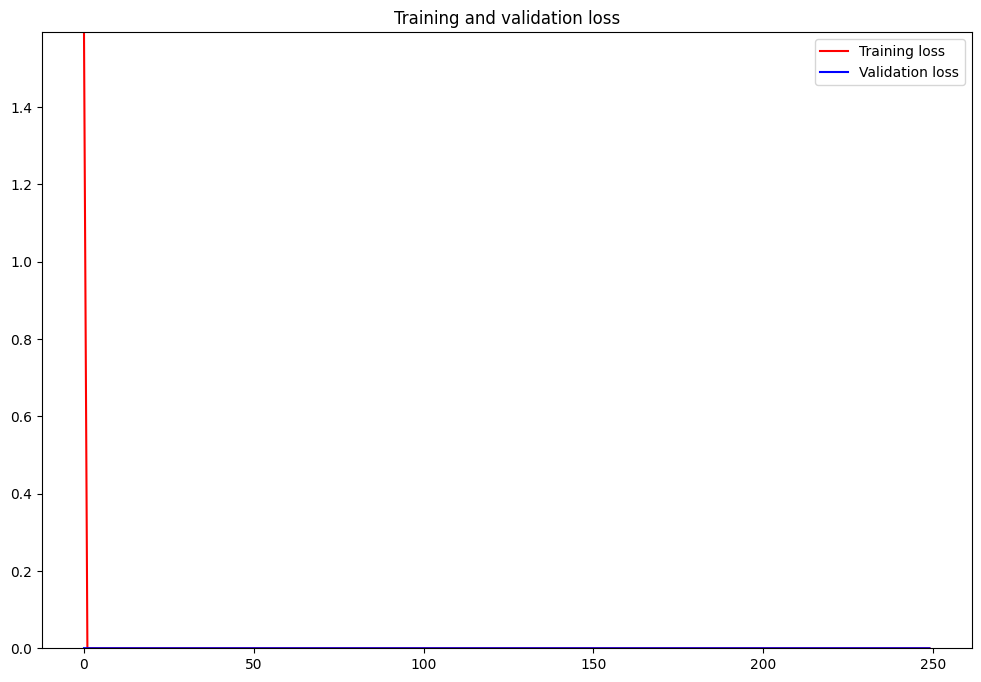

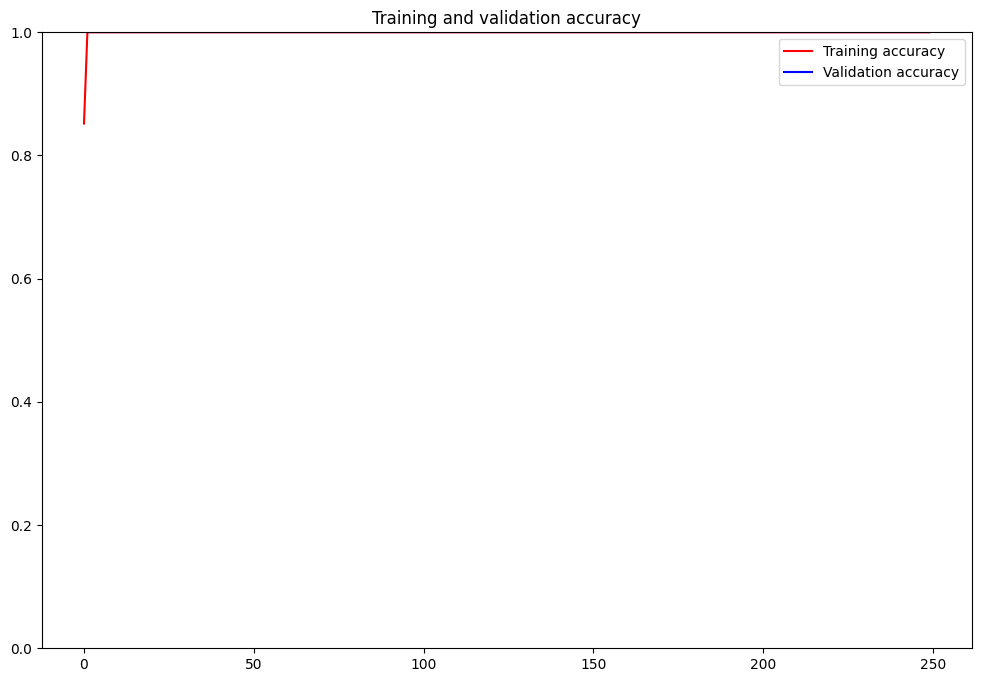

In [97]:
# 데이터 확인
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))

# Loss 그래프
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim(0, max(max(loss), max(val_loss)))  # y축 범위 지정
plt.legend(loc='best')
plt.show()

# Accuracy 그래프
plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylim(0, 1)  # y축 범위 지정 (0에서 1 사이)
plt.legend(loc='best')
plt.show()